<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gain-some-intuitive-understanding-into-the-Beta-distribution" data-toc-modified-id="Gain-some-intuitive-understanding-into-the-Beta-distribution-1">Gain some intuitive understanding into the Beta distribution</a></span></li><li><span><a href="#Simulate-Incoming-data" data-toc-modified-id="Simulate-Incoming-data-2">Simulate Incoming data</a></span></li><li><span><a href="#Visualise-different-beta-shapes" data-toc-modified-id="Visualise-different-beta-shapes-3">Visualise different beta shapes</a></span></li><li><span><a href="#Try-different-shapes-to-find-one-that-matches-a-prior-belief" data-toc-modified-id="Try-different-shapes-to-find-one-that-matches-a-prior-belief-4">Try different shapes to find one that matches a prior belief</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

import faker
from faker import utils

import seabornextends as snsexts
from seabornextends import plots, retouch
from seabornextends.retouch import grid, ax, fig

In [3]:
sns.set_style('whitegrid')
mpl.rcParams['grid.color'] = '0.95'
mpl.rcParams['grid.alpha'] = 0.8
mpl.rcParams['font.family'] = 'Roboto Condensed'
mpl.rcParams['figure.dpi'] = 150

In [4]:
SEED = 12345

LO_PROB = 0.001
HI_PROB = 0.999
n_prob_linspace = 1000
prob_linspace = np.linspace(start=LO_PROB, stop=HI_PROB, num=n_prob_linspace)

# Gain some intuitive understanding into the Beta distribution

Hyperparameters `alpha` and `beta` give the Beta distribution its shape. The Beta distribution returns values between 0 and 1 so it makes it particularly suitable for modelling probabilities.

Say we have some observations `successes` and `failures` (ones and zeros). We have an _observed_ proportion `observed_proportion=successes / trials`. We can model this _observed_ proportion as a random value drawn from a Beta distribution with shape `alpha=successes` and `beta=failures`.

The `beta` is a good distribution to use as prior for an unknown probability. 

It's general enough to support different levels of `informative` and `uninformative` priors:
* For `a=1 and b=1` it is an un-informative prior as it is equivalent to the `uniform`.
* For `a=0.5 and b=0.5` we are a bit more confident that the probability will likely be 0 or 1 than values in the middle but uncertainty is still quite high.
* For `a=20 and b=20` (or other equal `a=b` values > 0) the beta is centered at 0.5 which is useful when we're fairly confident that there's equal chance of a 50/50 chance in a given binary outcome (i.e. we're fairly confident that a fair coin will land heads _or_ tails 50% of the time).

Let's draw some random values from a beta:

Quantile corresponding to 0.5 probability: 0.009
Expected value of the beta distribution (the mean): 0.012
mean of sample: 0.012


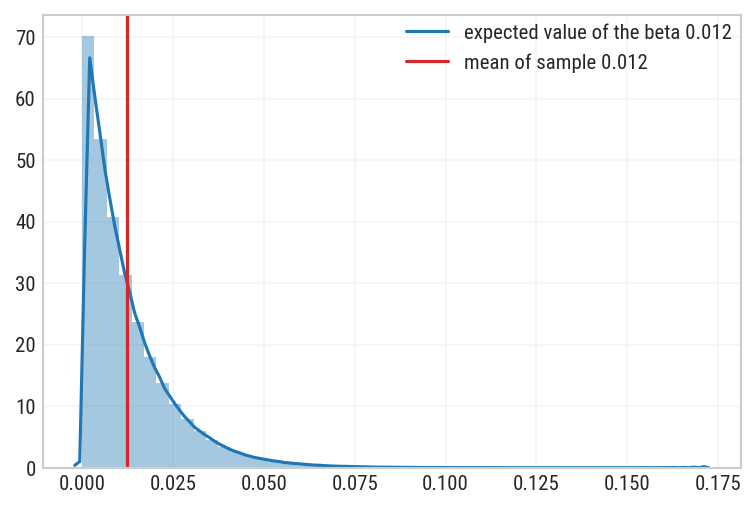

In [5]:
a = 1
b = 80

mybeta = stats.beta(a=a, b=b)
data = mybeta.rvs(size=1000000, random_state=SEED)

expected_beta = a / (a + b)
print("Quantile corresponding to 0.5 probability: {:.3f}".format(
    mybeta.ppf(0.5)))
print("Expected value of the beta distribution (the mean): {:.3f}".format(
    expected_beta))
print("mean of sample: {:.3f}".format(data.mean()))

ax = sns.distplot(data)
ax.axvline(expected_beta,
           color='C0',
           label='expected value of the beta {:.3f}'.format(expected_beta))
ax.axvline(data.mean(),
           color='C3',
           label='mean of sample {:.3f}'.format(data.mean()))

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)


Let's draw some random values out of a differently-shaped beta which has the same expected value

Quantile corresponding to 0.5 probability: 0.012
Expected value of the beta distribution (the mean): 0.012
mean of sample: 0.012


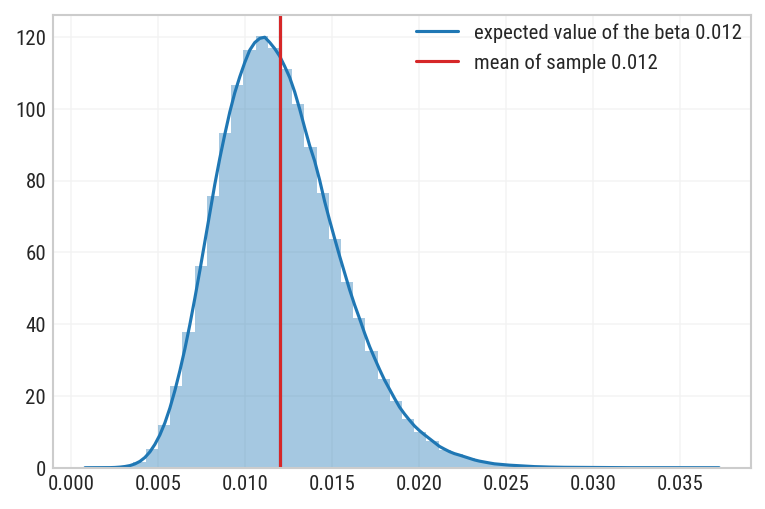

In [6]:
a = 12
b = 988

mybeta = stats.beta(a=a, b=b)
data = mybeta.rvs(size=1000000, random_state=SEED)

expected_beta = a / (a + b)
print("Quantile corresponding to 0.5 probability: {:.3f}".format(
    mybeta.ppf(0.5)))
print("Expected value of the beta distribution (the mean): {:.3f}".format(
    expected_beta))
print("mean of sample: {:.3f}".format(data.mean()))

ax = sns.distplot(data)
ax.axvline(expected_beta,
           color='C0',
           label='expected value of the beta {:.3f}'.format(expected_beta))
ax.axvline(data.mean(),
           color='C3',
           label='mean of sample {:.3f}'.format(data.mean()))

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)


Let's generate a binomial with shape `p=expected_beta` and `n=n_trials`. We can see that the proportion of successes (relative to `n_trials`) _converges towards the expected value_ of a beta distribution with shape `(a, b)`.

Quantile corresponding to 0.5 probability: 12.000
Expected value of the binomial distribution (the mean): 12.000
mean of successes sample: 12.043
mean of successes sample/n_trials: 0.012


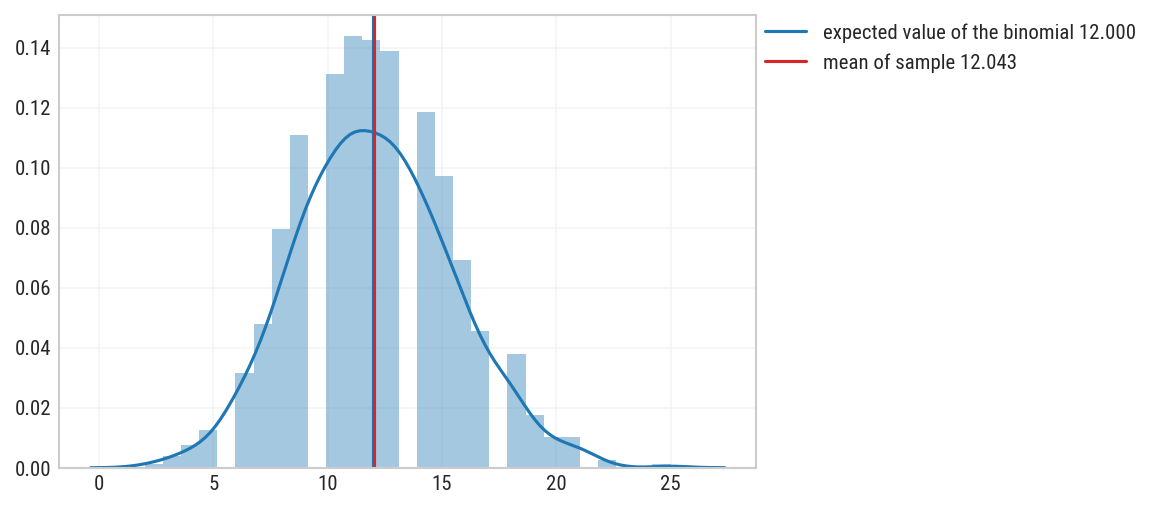

In [7]:
p = expected_beta
n_trials = 1000

# let's generate some values from the binomial with shape n_trials and p
# and see how many successes we would get
mybinom = stats.binom(n=n_trials, p=p)
successes = mybinom.rvs(size=1000, random_state=SEED)

expected_binom = n_trials * p
print("Quantile corresponding to 0.5 probability: {:.3f}".format(
    mybinom.ppf(0.5)))
print("Expected value of the binomial distribution (the mean): {:.3f}".format(
    expected_binom))
print("mean of successes sample: {:.3f}".format(successes.mean()))
print("mean of successes sample/n_trials: {:.3f}".format(successes.mean() / n_trials))

ax = sns.distplot(successes)
ax.axvline(expected_binom,
           color='C0',
           label='expected value of the binomial {:.3f}'.format(expected_binom))
ax.axvline(successes.mean(),
           color='C3',
           label='mean of sample {:.3f}'.format(successes.mean()))

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)


Let's do the reverse:

1. Generate a binomial with shape `n_trials` and `p`.
2. Calculate the expected number of `successes`.
3. Create a Beta with shape `a=successes` and `b=n_trials - successes` and see what its expected value is.

Quantile corresponding to 0.5 probability: 45.000
Expected value of the binomial distribution (the mean): 45.000
mean of successes sample: 44.940
mean of successes sample/n_trials: 0.045


Text(0.5,0.98,'100 random values from a binomial with shape n=1000 and p=0.045')

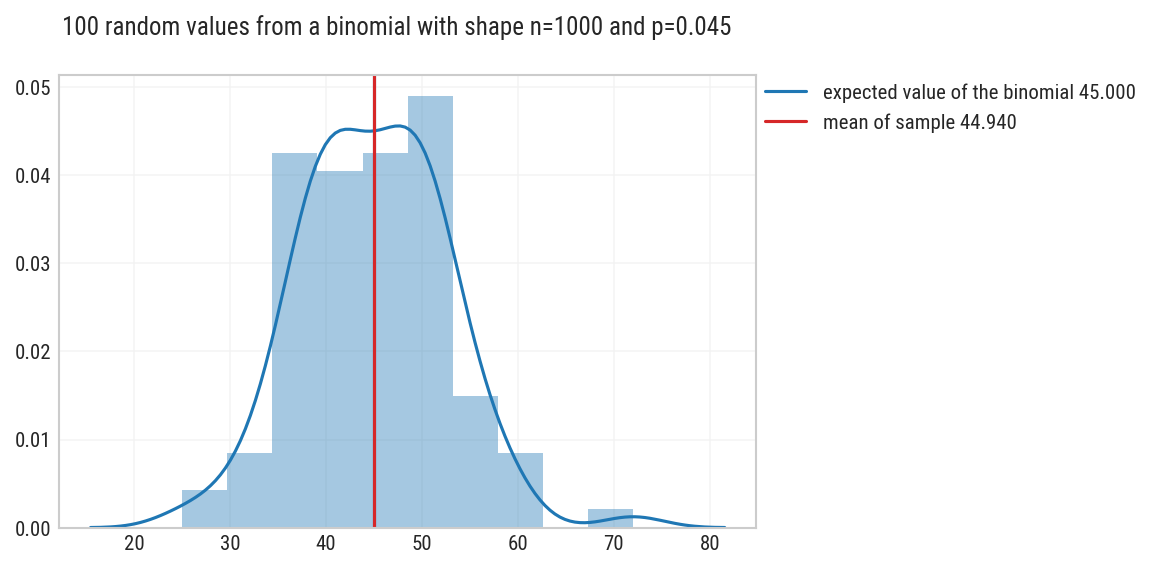

In [8]:
# chosen shape for the binomial
n_trials = 1000
p = 0.045
sample_size = 100

# let's generate some values from the binomial with shape n_trials and p
mybinom = stats.binom(n=n_trials, p=p)
successes = mybinom.rvs(size=sample_size, random_state=SEED)

expected_binom = n_trials * p
print("Quantile corresponding to 0.5 probability: {:.3f}".format(
    mybinom.ppf(0.5)))
print("Expected value of the binomial distribution (the mean): {:.3f}".format(
    expected_binom))
print("mean of successes sample: {:.3f}".format(successes.mean()))
print("mean of successes sample/n_trials: {:.3f}".format(successes.mean() / n_trials))

fig, ax = plt.subplots(1, 1)
ax = sns.distplot(successes)
ax.axvline(expected_binom,
           color='C0',
           label='expected value of the binomial {:.3f}'.format(expected_binom))
ax.axvline(successes.mean(),
           color='C3',
           label='mean of sample {:.3f}'.format(successes.mean()))

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.gcf().suptitle(t='{} random values from a binomial with shape n={} and p={}'.format(sample_size, n_trials, p))


Quantile corresponding to 0.5 probability: 0.045
Expected value of the beta distribution (the mean): 0.045
mean of sample: 0.046


Text(0.5,0.98,'100 random values from a beta with shape a=45.0 and b=955.0')

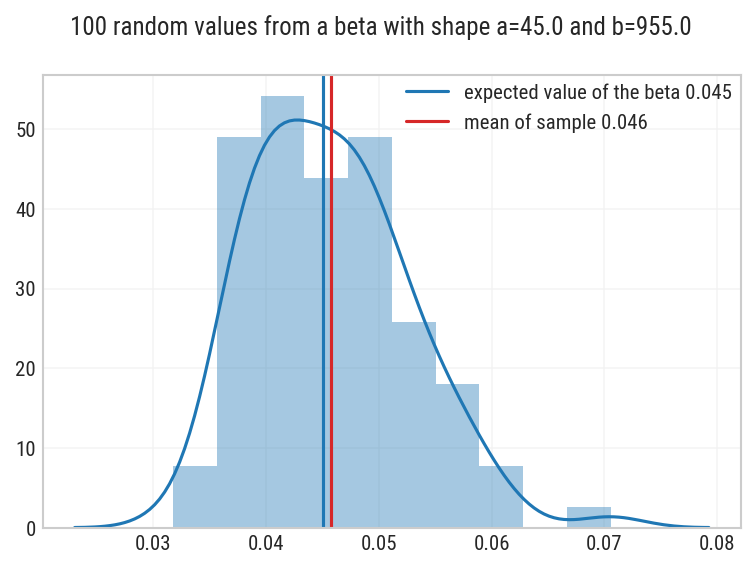

In [9]:
a = expected_binom
b = n_trials - expected_binom

mybeta = stats.beta(a=a, b=b)
data = mybeta.rvs(size=sample_size, random_state=SEED)

expected_beta = a / (a + b)
print("Quantile corresponding to 0.5 probability: {:.3f}".format(
    mybeta.ppf(0.5)))
print("Expected value of the beta distribution (the mean): {:.3f}".format(
    expected_beta))
print("mean of sample: {:.3f}".format(data.mean()))

fig, ax = plt.subplots(1, 1)
ax = sns.distplot(data)
ax.axvline(expected_beta,
           color='C0',
           label='expected value of the beta {:.3f}'.format(expected_beta))
ax.axvline(data.mean(),
           color='C3',
           label='mean of sample {:.3f}'.format(data.mean()))

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.gcf().suptitle(t='{} random values from a beta with shape a={} and b={}'.format(sample_size, a, b))


For all our fake successes, let's plot _all_ the beta distributions. This illustrates that the `p` that gives the binomial its shape is in itself a distribution.

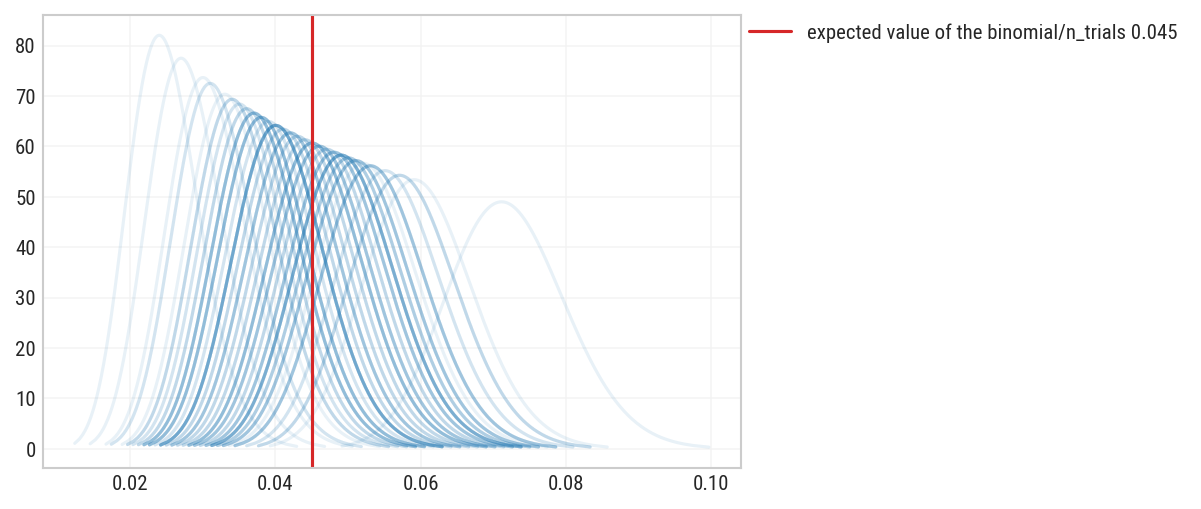

In [10]:
fig, ax = plt.subplots(1, 1)

expected_values = list()
for _successes in successes:
    a = _successes
    b = n_trials - _successes

    mybeta = stats.beta(a=a, b=b)

    expected_beta = a / (a + b)
    expected_values.append(expected_beta)

    plt.plot(mybeta.ppf(prob_linspace),
             mybeta.pdf(mybeta.ppf(prob_linspace)),
             alpha=0.1,
             color='C0')
    
ax.axvline(expected_binom / n_trials,
           color='C3',
           label='expected value of the binomial/n_trials {:.3f}'.format(expected_binom / n_trials))
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)


^^ We can see that the expected values for all the beta distributions converge to the `p` of our original binomial.

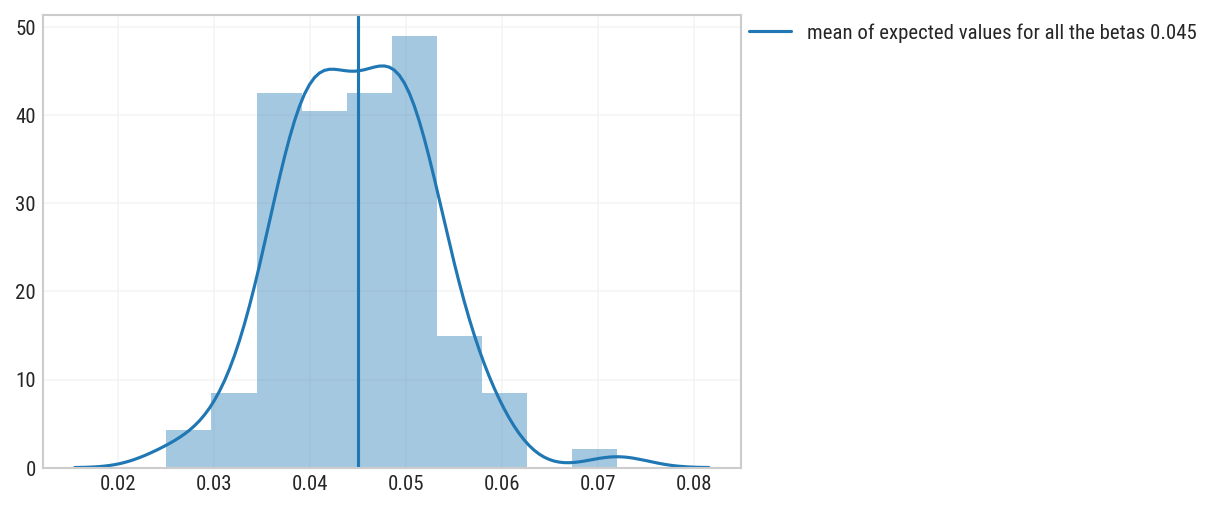

In [11]:
expected_values = np.array(expected_values)
ax = sns.distplot(expected_values)
ax.axvline(expected_values.mean(), label='mean of expected values for all the betas {:.3f}'.format(expected_values.mean()))
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)


# Simulate Incoming data

Say we have a `campaign` with observed `sessions` and `conversions`. 

Simulate incoming observations and plot the new _updated_ beta distributions. Each updated beta represents the posterior beta distribution of CVR in the presence of the new evidence. 

Notice how the beta distributions are tighter and tigher as more evidence comes in.

In [12]:
def simulate(initial_sessions,
             initial_conversions):

    sessions = initial_sessions
    conversions = initial_conversions
    failures = initial_sessions - initial_conversions

    print("initial conversions: {}, initial failures: {}".format(
        initial_conversions, failures))

    # how many times are we receiving new observations
    n_measurements = 20

    # how many new observations are coming in at every new measurement
    n_new_obs = 10

    betas = list()

    # transparencies
    alphas = np.linspace(start=0.1, stop=1, num=n_measurements)

    for i in range(n_measurements):
        # generate random bernoulli events for the new observations that come in for measurement i
        # we assume each observation is equally likely to be a success as it is to be a failure
        new_obs = stats.bernoulli.rvs(p=0.5, size=n_new_obs)

        new_sessions = new_obs.shape[0]
        new_conversions = new_obs.sum()

        # our cumulative totals to date
        sessions += new_sessions
        conversions += new_conversions
        failures += new_sessions - new_conversions

        print("conversions: {}, failures: {} at measurement {}".format(conversions, failures, i + 1))

        posterior_beta = stats.beta(a=conversions, b=failures)

        betas.append(posterior_beta)

        plt.plot(posterior_beta.ppf(prob_linspace),
                 posterior_beta.pdf(posterior_beta.ppf(prob_linspace)),
                 alpha=alphas[i],
                 color='C0',
                 label='posterior beta at measurement {}'.format(i + 1))

    plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)
    

initial conversions: 2, initial failures: 8
conversions: 6, failures: 14 at measurement 1
conversions: 9, failures: 21 at measurement 2
conversions: 12, failures: 28 at measurement 3
conversions: 18, failures: 32 at measurement 4
conversions: 23, failures: 37 at measurement 5
conversions: 28, failures: 42 at measurement 6
conversions: 34, failures: 46 at measurement 7
conversions: 41, failures: 49 at measurement 8
conversions: 46, failures: 54 at measurement 9
conversions: 51, failures: 59 at measurement 10
conversions: 57, failures: 63 at measurement 11
conversions: 61, failures: 69 at measurement 12
conversions: 66, failures: 74 at measurement 13
conversions: 70, failures: 80 at measurement 14
conversions: 76, failures: 84 at measurement 15
conversions: 80, failures: 90 at measurement 16
conversions: 83, failures: 97 at measurement 17
conversions: 87, failures: 103 at measurement 18
conversions: 91, failures: 109 at measurement 19
conversions: 98, failures: 112 at measurement 20


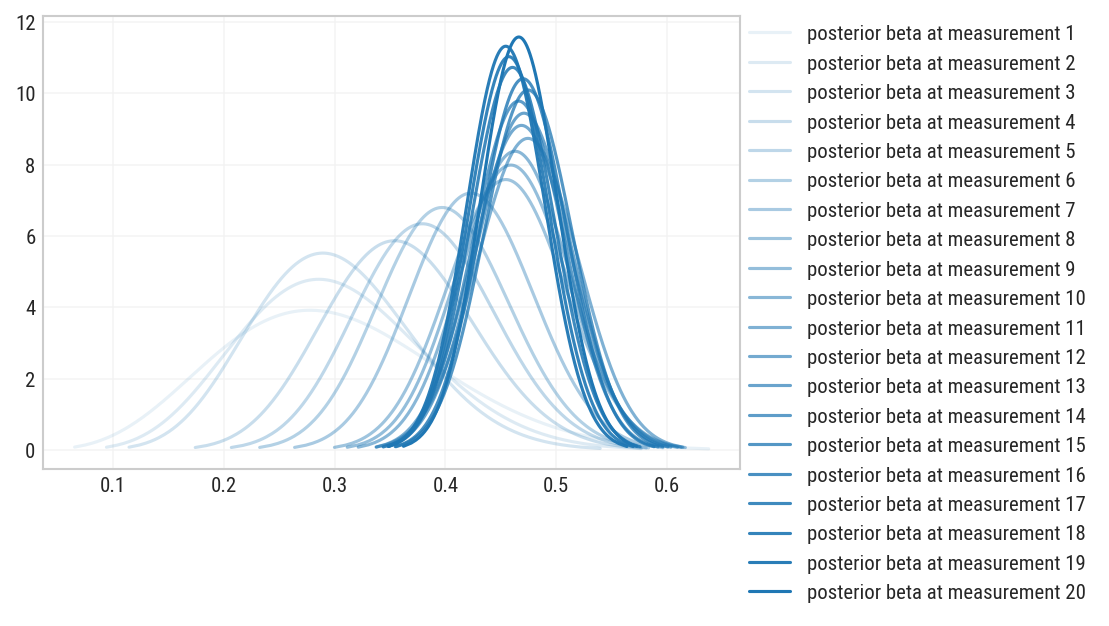

In [13]:
simulate(initial_sessions=10, initial_conversions=2)

The relationship therefore between the `a`, `b` hyperparameters of a beta distribution and a binomial can be thought of:

**Current observations:**
alpha = successes

beta = misses

Beta(alpha, beta)

Expected value of the Beta = (successes / total observations) = alpha / (alpha + beta)

**Update with new observations:**
This is the posterior Beta distribution in the presence of new evidence (new observations).

_If new observation is a success:_
Beta(alpha + 1, beta)

Expected value of the Beta becomes = (alpha + 1) / (alpha + 1 + beta)


_If new observation is failure:_
Beta(alpha, beta + 1)

Expected value of the Beta becomes = alpha / (alpha + beta + 1)

# Visualise different beta shapes

In [14]:
shape_grid = {
    'a': [0.5, 1, 2, 3, 20],
    'b': [0.5, 1, 2, 3, 20]
}

df = faker.utils.stacked_from_function(func=stats.beta.rvs,
                                       param_grid=shape_grid,
                                       col_names=['random_value'],
                                       iters=10000,
                                       seed=12345)

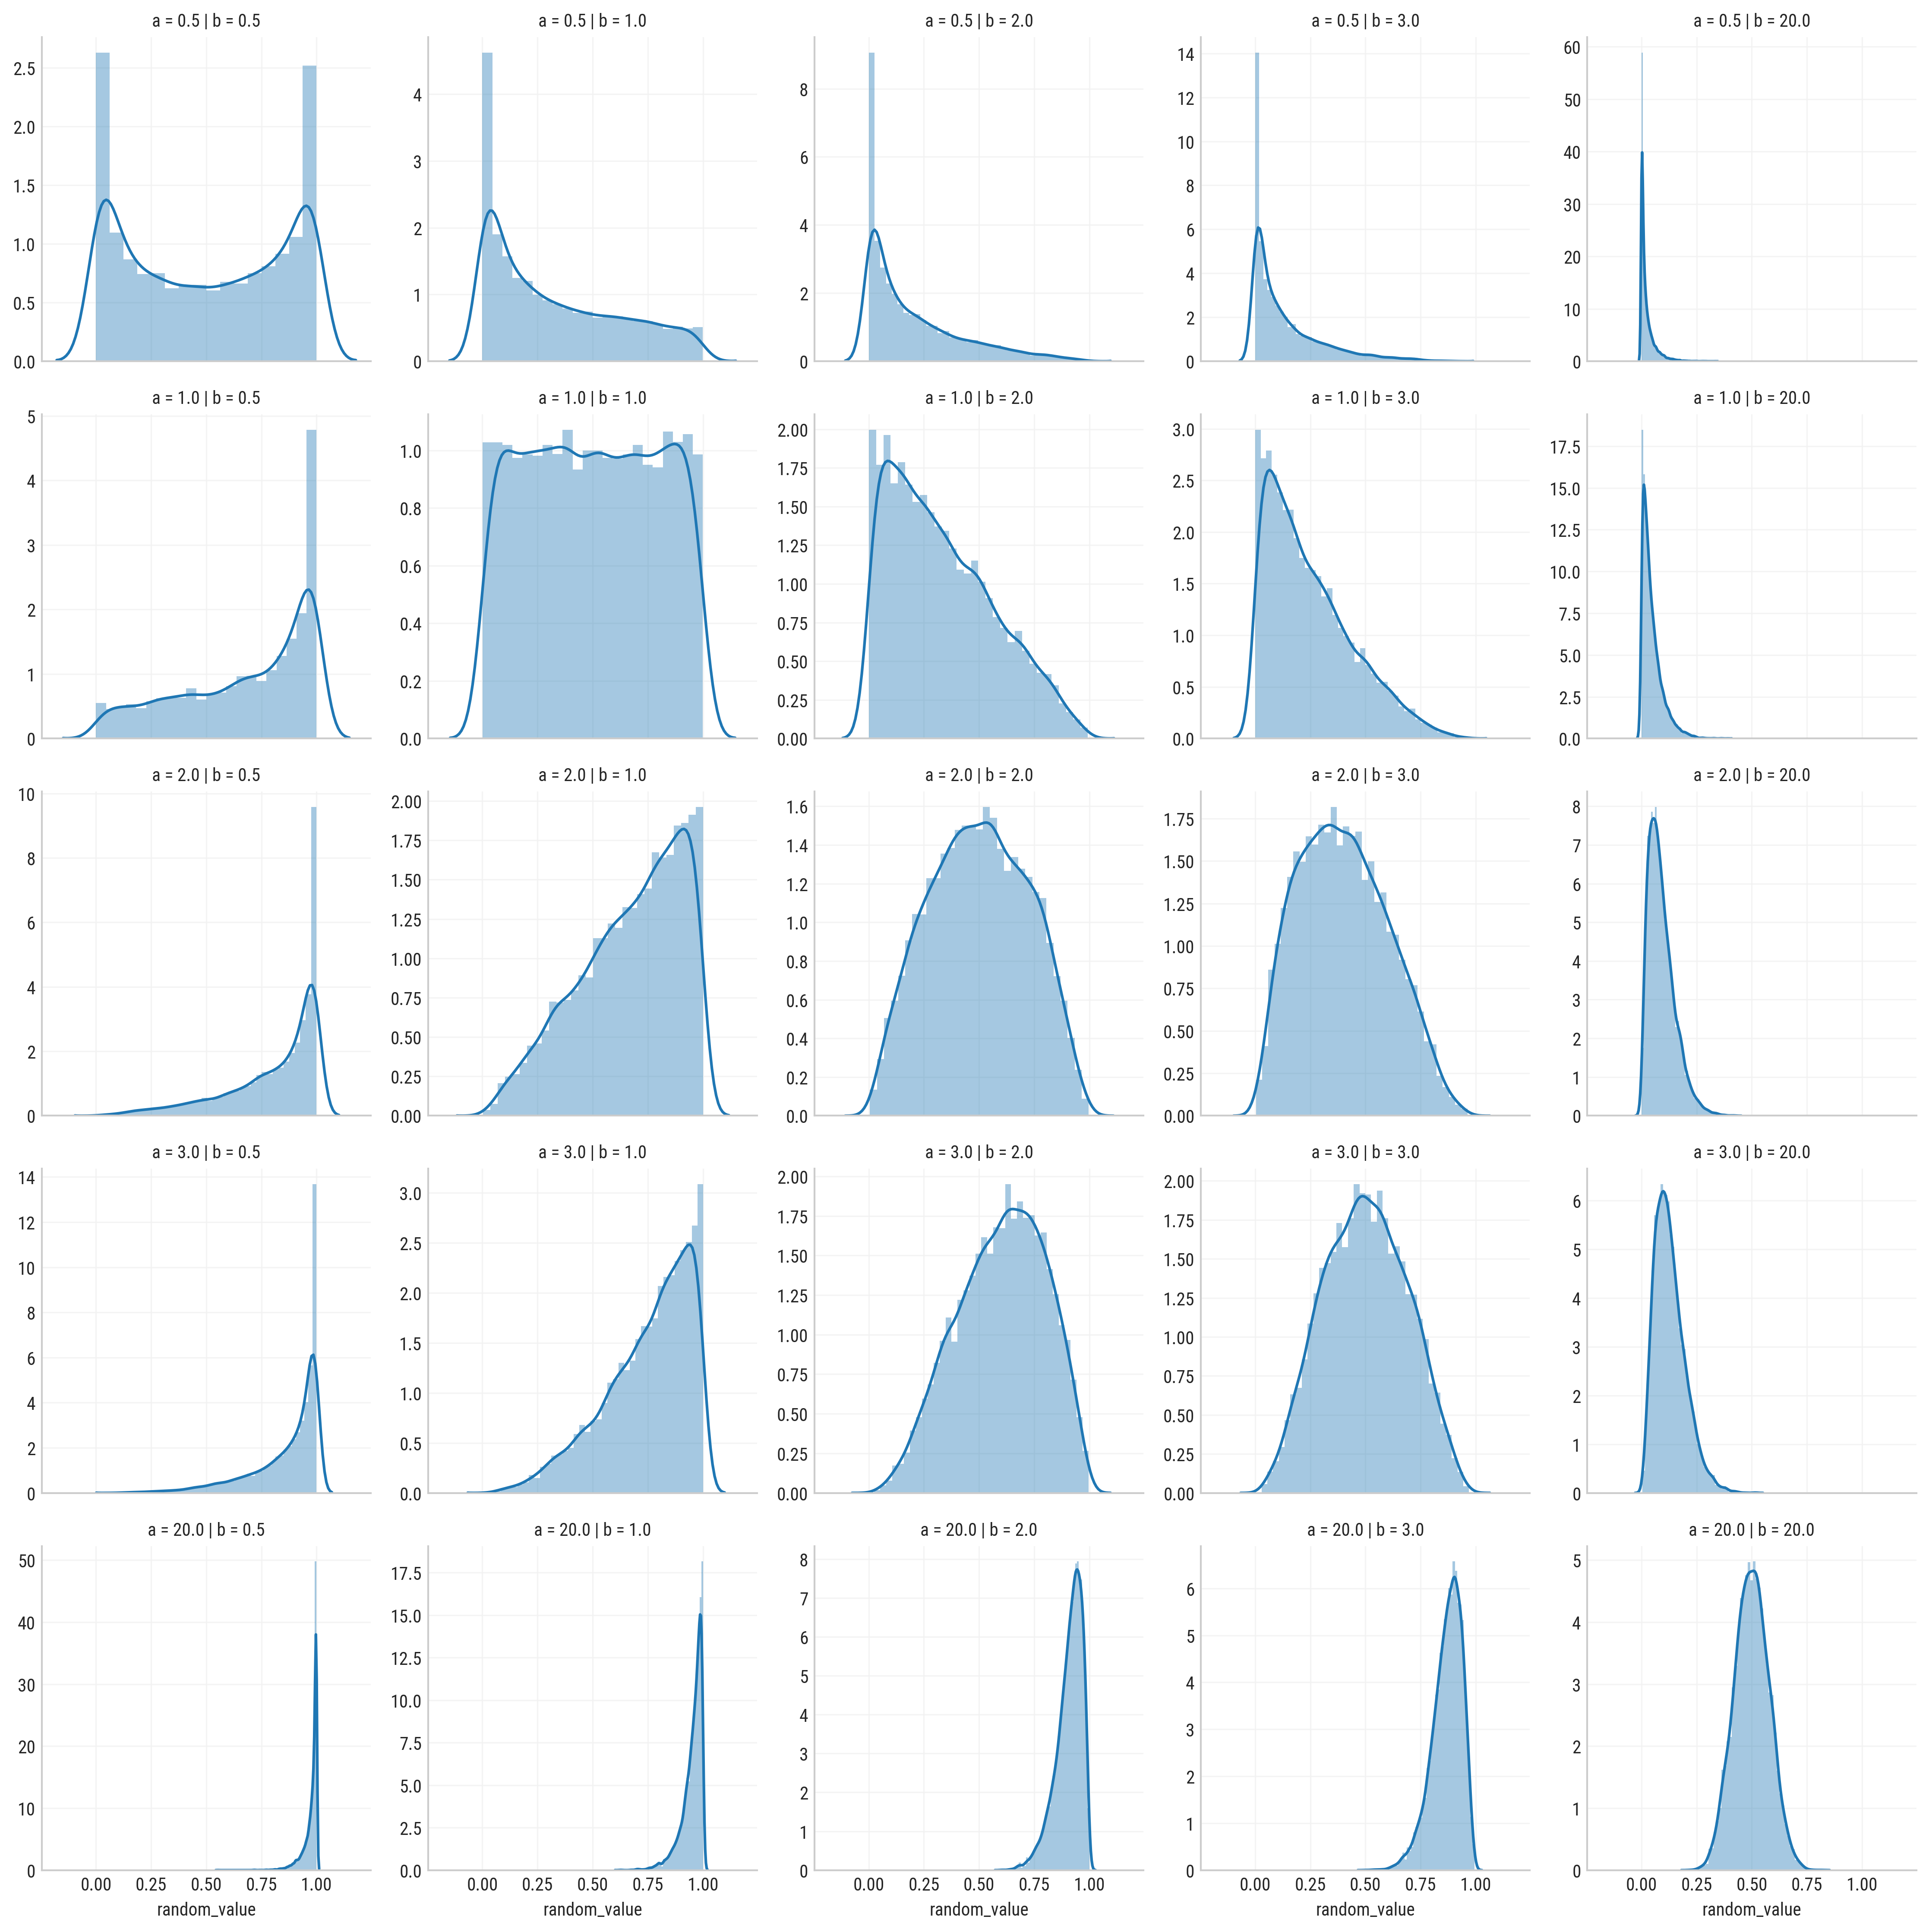

In [15]:
grid = snsexts.plots.distplot(a='random_value',
                              data=df,
                              row='a',
                              col='b',
                              sharex=True,
                              sharey=False,
                              distplot_kws={'hist': True, 'kde': True})

retoucher = snsexts.retouch.grid.FacetGridRetoucher(grid)
fig = retoucher.fig
fig.set_dpi(300)

# Try different shapes to find one that matches a prior belief

Here we try to find a `(a, b)` shape that gives us a beta distribution we can use as prior belief for ecommerce conversion rates (which we know hover around the ~5% mark, are typically very small but some ecommerce players observe very high conversion rates but this is very unlikely to exceed 25%).

We're looking for a beta that gives us roughly 90.0% of values in the distribution are lower than 0.05.

In [16]:
mybeta = stats.beta(a=4, b=80)
p = 0.9
print("{:.1%} of values in the distribution are lower than: {:.3f}".format(p, mybeta.ppf(p)))
print("the most likely value in the distribution is: {:.3f}".format(mybeta.ppf(0.5)))

90.0% of values in the distribution are lower than: 0.079
the most likely value in the distribution is: 0.044


0.04760628876420776


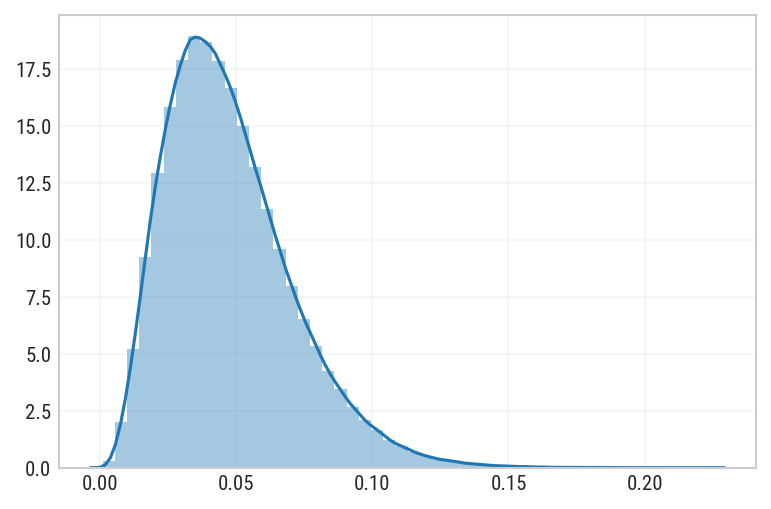

In [17]:
data = mybeta.rvs(size=1000000)
print(data.mean())
sns.distplot(data)
